## Here we are specifically using EMNIST letter dataset. So Let's get started

In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-balanced-train-images-idx3-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-byclass-train-images-idx3-ubyte
/kaggle/inp

In [20]:
#/kaggle/input/emnist/emnist-letters-mapping.txt
testing_letter = pd.read_csv('/kaggle/input/emnist/emnist-letters-test.csv')
training_letter = pd.read_csv('/kaggle/input/emnist/emnist-letters-train.csv')

In [21]:
print(training_letter.shape)
print(testing_letter.shape)

(88799, 785)
(14799, 785)


In [22]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


## Let's see what type of images we have got. 

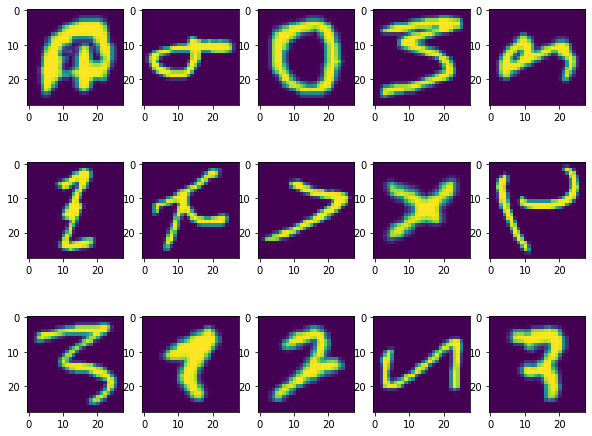

In [23]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))


In [24]:
import tensorflow as tf

# Preprocesssing

# 1. Normalisation and reshaping of data

### Before feeding in the data to the model we will normalise and reshape the data given to us. This will decrease the complexity of the models and make the model work efficiently as less complex numbers will be there to process.

In [25]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [26]:
# Transform labels
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

# Lets create a CNN for the classification of these random images.

In [27]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [41]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [42]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## Adding Callback API's to save best weights and change lr

In [43]:
 
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [44]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Train on 71039 samples, validate on 17760 samples
Epoch 1/10
71008/71039 [============================>.] - ETA: 0s - loss: 0.5522 - accuracy: 0.8272
Epoch 00001: val_accuracy improved from -inf to 0.88519, saving model to Best_points.h5
71039/71039 [==============================] - 60s 848us/sample - loss: 0.5520 - accuracy: 0.8272 - val_loss: 0.3580 - val_accuracy: 0.8852
Epoch 2/10
71008/71039 [============================>.] - ETA: 0s - loss: 0.2798 - accuracy: 0.9081
Epoch 00002: val_accuracy improved from 0.88519 to 0.89842, saving model to Best_points.h5
71039/71039 [==============================] - 59s 825us/sample - loss: 0.2798 - accuracy: 0.9081 - val_loss: 0.3316 - val_accuracy: 0.8984
Epoch 3/10
70976/71039 [============================>.] - ETA: 0s - loss: 0.2234 - accuracy: 0.9258
Epoch 00003: val_accuracy improved from 0.89842 to 0.90557, saving model to Best_points.h5
71039/71039 [==============================] - 57s 808us/sample - loss: 0.2235 - accuracy: 0.9259 - 

## Let's plot Accuracy vs Val_Accuracy to further evaluation..

In [45]:
import seaborn as sns

Text(0, 0.5, 'Accuray')

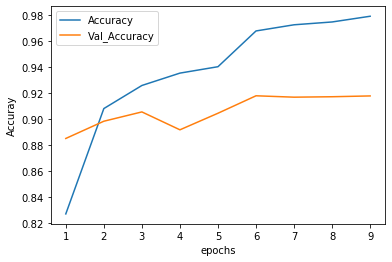

In [46]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

## Changing the test_split size to 0.15 to see if validation score increases or not

In [47]:
train_x2,test_x2,train_y2,test_y2 = train_test_split(train_images,y1,test_size=0.15,random_state = 42)

In [48]:
history1 = model.fit(train_x2,train_y2,epochs=10,validation_data=(test_x2,test_y2))

Train on 75479 samples, validate on 13320 samples
Epoch 1/10
75479/75479 [==============================] - 60s 792us/sample - loss: 0.0804 - accuracy: 0.9722 - val_loss: 0.3490 - val_accuracy: 0.9203
Epoch 2/10
75479/75479 [==============================] - 60s 790us/sample - loss: 0.0724 - accuracy: 0.9742 - val_loss: 0.3359 - val_accuracy: 0.9199
Epoch 3/10
75479/75479 [==============================] - 60s 799us/sample - loss: 0.0675 - accuracy: 0.9761 - val_loss: 0.3807 - val_accuracy: 0.9194
Epoch 4/10
75479/75479 [==============================] - 60s 799us/sample - loss: 0.0632 - accuracy: 0.9764 - val_loss: 0.4050 - val_accuracy: 0.9173
Epoch 5/10
75479/75479 [==============================] - 61s 803us/sample - loss: 0.0602 - accuracy: 0.9779 - val_loss: 0.3949 - val_accuracy: 0.9164
Epoch 6/10
75479/75479 [==============================] - 61s 810us/sample - loss: 0.0568 - accuracy: 0.9786 - val_loss: 0.3821 - val_accuracy: 0.9142
Epoch 7/10
75479/75479 [====================

Text(0, 0.5, 'Accuray')

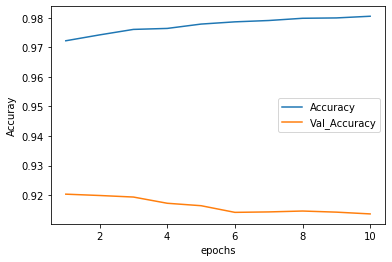

In [49]:
q = len(history1.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history1.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history1.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

# As the validation score score went down we won't be changing the test_split size. 
# Thus the above model is better than the latter one.

## Hope everyone who reads this notebook finds it helpful. 
## Do upvote it. Thank You🙏😃